In [1]:
'''
David Pogrebitskiy
DS2500
Project 1: Used Car Attribute Importance
02/23/2022
'''

'\nDavid Pogrebitskiy\nDS2500\nProject 1: Used Car Attribute Importance\n02/23/2022\n'

In [2]:
'''
Research Question:
    Which features/attributes are most significant
    when determing the price of a used car?
'''

'\nResearch Question:\n    Which features/attributes are most significant\n    when determing the price of a used car?\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
'''
IMPORTANT NOTE: File was too big to upload to Gradescope so 
professors intructed me to drop insignificant columns
and then resave it as a new csv file. This file is the 
smaller, cleaned file.

The full dataset can be found at:
https://www.kaggle.com/austinreese/craigslist-carstrucks-data
'''
# Read in dataset using Pandas
cars = pd.read_csv('cars_clean.csv')

In [5]:
# See what attributes I have to work with
cars.columns

Index(['price', 'year', 'manufacturer', 'cylinders', 'fuel', 'odometer',
       'paint_color'],
      dtype='object')

In [6]:
# Drop rows with missing data
cars = cars.dropna()

In [7]:
# Rename for legibility
cars = cars.rename(columns = {'odometer' : 'miles'})

In [8]:
# Remove outliers and other records that make
# the data difficult to work with
cars = cars[cars.cylinders != 'other']
cars = cars[cars.price > 1000]
cars = cars[cars.price < 500000]
cars = cars[cars.miles < 300000]

In [9]:
# Rename categorical variables to a discrete set to later
# be able to measure correlation

cars.replace(['3 cylinders', '4 cylinders', '5 cylinders',
              '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders'],
             [3, 4, 5, 6, 8, 10, 12], inplace = True)

In [10]:
# Find the remaining categorical features and converts the 
# to discrete numbers for mathematical operations

categorical = [i for i in cars.columns if cars.dtypes[i]=='object']

for column in categorical:
    cars[column] = cars[column].factorize()[0]

In [11]:
cars.describe()

,price,year,manufacturer,cylinders,fuel,miles,paint_color
count,173855.000000,173855.000000,173855.000000,173855.000000,173855.000000,173855.000000,173855.000000
mean,18030.417699,2010.405620,7.973282,5.961980,0.143085,99092.757148,2.786011
std,14086.955139,9.287681,8.084976,1.595414,0.501809,60761.473160,2.422368
min,1012.000000,1900.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,7100.000000,2007.000000,2.000000,4.000000,0.000000,48492.000000,1.000000
50%,13995.000000,2013.000000,4.000000,6.000000,0.000000,96500.000000,3.000000
75%,26000.000000,2016.000000,12.000000,8.000000,0.000000,140707.500000,4.000000
max,289995.000000,2022.000000,41.000000,12.000000,4.000000,299999.000000,11.000000


In [12]:
# Creates a correlation matrix and retreives only
# the row that compares price to the rest of the features.
corr = cars.corr()
corr = corr.reset_index(drop=True)
corr = corr.loc[0]


# Converts the Series object to a dictionary
corr_dict = corr.to_dict()
corr_dict.pop('price');

In [13]:
# Sorts the dictionary items based on correlation value
corr_dict = sorted(corr_dict.items(), key=lambda x: x[1], reverse = True)
corr_dict

[('year', 0.35339632350438727),
 ('cylinders', 0.34902548821117124),
 ('fuel', 0.17629837567983667),
 ('paint_color', -0.11632615633109322),
 ('manufacturer', -0.12325149848140994),
 ('miles', -0.5605421023061382)]

In [14]:
# Creates the x and y lists of feature and correlation
# coefficients for plotting
x_list = []
y_list = []
for elem in corr_dict:
    x_list.append(elem[0])
    y_list.append(elem[1])

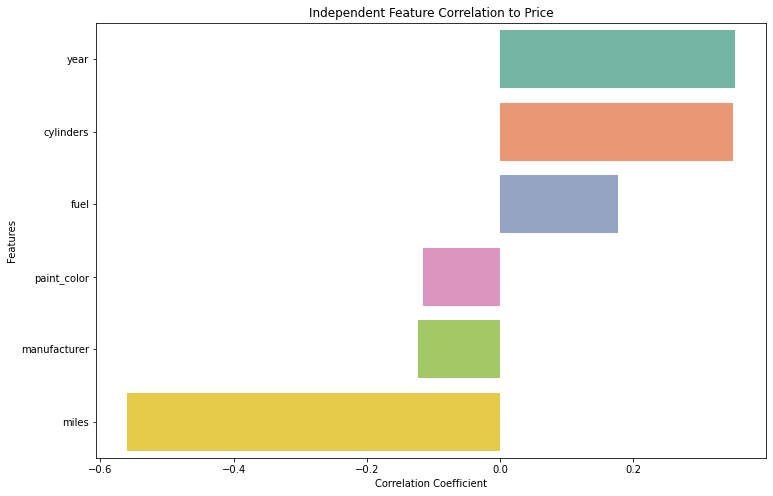

In [15]:
# Plots each features correlation vs
# the price of the car to measure significance

plt.figure(figsize=(12,8))
sns.barplot(x = y_list, y = x_list, palette = 'Set2', orient = 'h')
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')
plt.title('Independent Feature Correlation to Price')
plt.show()

In [16]:
'''
For comparabiliy, I decided to take the absolute value of each correlation.
To make it easy to see which features are most significant,
I wanted the bar chart to be sorted from most significant to least 
significant.
'''


# Takes abs of each coefficient for comparability and sorts in descending order
y_list_abs = [abs(elem) for elem in y_list]

# Merge the x and y lists then sort in 
# ascening order by the coefficient values
merged = list(zip(x_list, y_list_abs))
merged.sort(key = lambda x: x[1], reverse = True)

# After sorting, seperates the tuples again
# for ease in graphing
features = []
coeff = []
for tup in merged:
    features.append(tup[0])
    coeff.append(tup[1])

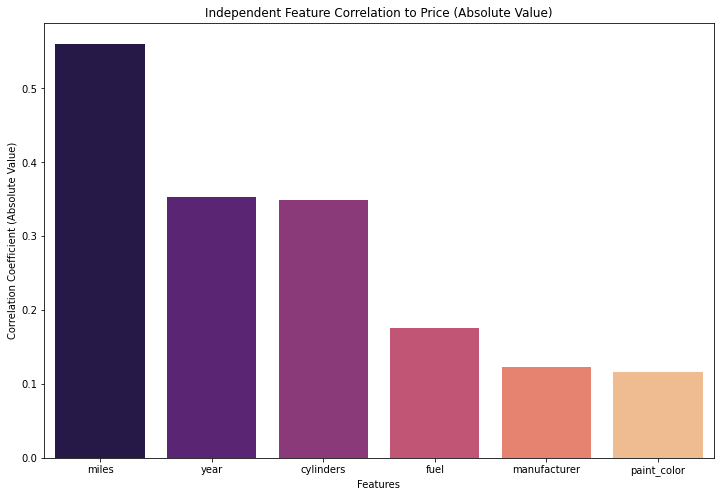

In [17]:
# Because the research question was solely about significance, 
# the absolute value of every coefficient was taken
# so its easier to assess significance when looking at the below bar plot

plt.figure(figsize=(12,8))
sns.barplot(x = features, y = coeff, palette = 'magma')
plt.ylabel('Correlation Coefficient (Absolute Value)')
plt.xlabel('Features')
plt.title('Independent Feature Correlation to Price (Absolute Value)')
plt.show()